## Revision del ACF para AR(2). Corregir error en el codigo AR(2), raices reales distintas.

### Cuatro formas distintas de calcular ACF


## ACF using NumPy

[link text](https://)



In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mu, sigma = 0, 1
N=1000
Z = np.random.normal(mu, sigma, N)

phi_1=0.7
phi_2 = 0.2
X = np.zeros(N)
X[0] = Z[0]
X[1] = Z[1]

for t in range(2, N):
    X[t] = Z[t] + phi_1*X[t-1] + phi_2 * X[t-2]



$$ \rho(\tau) = \frac{\mathbb{E}[X_t X_{t+\tau}]}{\mathbb{var}{X_t}} $$

Se puede calcular usando NumPy, como el coeficiente de correlacion de $X_t$ con $X_{t+\tau}$. 

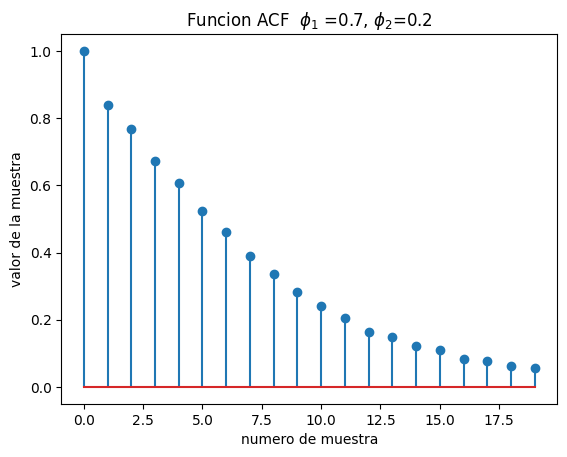

In [22]:
M=20
temps=X
rho2 = np.zeros(M)
rho2[0] = 1 # siempre

for tau in range(1, M):
    tempsL = temps[:-tau] # X(t) : chopped at the end to fit dimensiones
    tempspL = temps[tau:] # X(t+tau). 

    rho2[tau] = np.corrcoef(tempsL, tempspL)[0,1]

# etiquetas
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f"Funcion ACF  $\phi_1$ ={phi_1}, $\phi_2$={phi_2}")

plt.stem(rho2);
plt.show();

se deja de tarea el caso de raices repetidas.
## Yule Walker Equation:
Cual es el modelo actual que tenemos?

$$ X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + Z_t  \quad , (1) $$.

Hasta este punto nosotros calculamos $X_t$ de varias formas (iterativa basa en esta ecuacion y analitica resolviendo esta ecuacion en diferencias, dado que conocemos $\phi_1$, $\phi_2$. 

Ahora resolvemos el **problema inverso**. Es decir, asumiendo informacion de los datos (la funcion ACF de los datos) queremos hallar los coeficientes $\hat{\phi_1}$, $\hat{\phi_2}$.  Este es el plan de trabajo  para hoy.

1. Calculemos el lag (retraso) 1 de la correlacion. 
Usando la ecuacion (1) cambiando $X_t$ por $X_{t+1}$. 

\begin{eqnarray}
X_t X_{t+1} &=& X_t ( \phi_1 X_t + \phi_2 X_{t-1} + Z_{t+1}) \\
&=& \phi_1 X_t X_t + \phi_2 X_t X_{t-1} + X_t Z_{t+1} 
\end{eqnarray}

De forma que, aplicando la esperanza a esta ecuacion:

\begin{eqnarray}
\gamma_1 &=& \phi_1 \mathbb{E}[X_t X_t] + \phi_2 \mathbb{E}[X_t X_{t-1}] + \cancel{\mathbb{E}[X_t Z_{t+1}]} \\
&=& \phi_1 \gamma_0 + \phi_2 \gamma_1
\end{eqnarray}
Dividimos por $\gamma_0 = \sigma_2$ y encontramos

$$ \rho_1 = \phi_1 \rho_0 + \phi_2 \rho_1 \quad , \quad (2) $$

2. Calculemos el lag 2:

\begin{eqnarray}
X_t X_{t+2} &=& X_t ( \phi_1 X_{t+1} + \phi_2 X_{t} + Z_{t+2}) \\
&=& \phi_1 X_t X_{t+1} + \phi_2 X_t X_{t} + X_t Z_{t+2} 
\end{eqnarray}

Igualmente, aplicando la esperanza a esta ecuacion:

\begin{eqnarray}
\gamma_2 &=& \phi_1 \mathbb{E}[X_t X_{t+1}] + \phi_2 \mathbb{E}[X_t X_{t}] + \cancel{\mathbb{E}[X_t Z_{t+2}]} \\
&=& \phi_1 \gamma_1 + \phi_2 \gamma_0
\end{eqnarray}

Igualmente, dividiendo por $\gamma_0=\sigma^2$ (la varianza de $X_t$)

$$ \rho_2 = \phi_1 \rho_1 + \phi_2 \rho_0\quad , \quad (3)$$
De las ecuacion (2) y (3) en forma matricial encontramos:

\begin{eqnarray}
\begin{pmatrix}
\rho_0 & \rho_1 \\
\rho_1 & \rho_0 
\end{pmatrix}
\begin{pmatrix}
\phi_1 \\
\phi_2
\end{pmatrix}
= \begin{pmatrix}
\rho_1 \\
\rho_2 
\end{pmatrix}
\end{eqnarray}

A este sistema se le conoce como las Yule-Walker equations. En procesamiento de senales, a este se lo conoce como el 

[Wiener-Hopf filter](https://en.wikipedia.org/wiki/Wiener_filter).

Con esto encontramos los coeficientes, estimados $\hat{\phi_1}, \hat{\phi_2}$. 

Hallemos la funcion de autocorrelacion ACF.

Ya sabemos

\begin{eqnarray}
\rho_0 &=& 1 \\
\rho_1 &=& \frac{\phi_1}{1 - \phi_2} \quad \text{clase anterior}
\end{eqnarray}


Como hallamos $\rho_k$?  Viajemos a la clase 15.






$$ \gamma_k = \phi_1 \gamma_{k-1} + \phi_2 \gamma_{k-2} + \mathbb{E}[Z_t X_{t-k}] $$
Donde


\begin{eqnarray}
\gamma_0 &=& \sigma_0^2  \quad , k=0 \\
\gamma_k &=& \phi_1 \gamma_{k-1} + \phi_2 \gamma_{k-2} \quad , \quad k=1,2, \cdots 
\end{eqnarray}

Si dividimos por $\gamma_0 = \rho^2$ obtenemos

\begin{eqnarray}
\rho_0 &=& 1  \quad , k=0 \\
\rho_1 &=& \frac{\phi_1}{1 - \phi_2} \quad \text{clase anterior}
\rho_k &=& \phi_1 \rho_{k-1} + \phi_2 \rho_{k-2} \quad , \quad k=1,2, \cdots \\
\rho_k &=& \phi_1 \rho_{k-1} + \phi_2 \rho_{k-2}. 
\end{eqnarray}
Esta es una ecuacion en diferencias de segundo orden recursiva (homogenea, como la Fibonacci y las otras en clase para $X_t$.

La solucion esta dada por


$$ \rho_k = \frac{r_1 (\sigma^2 - r_2 \rho_1)}{r_1 - r_2} \left ( \frac{1}{r_1} \right )^k  + \frac{r_2(r_1 \rho_1 - \sigma^2}{r_1 -r_2} \left ( \frac{1}{r_2} \right )^k \quad , \quad (4) $$

Encontremos ACF para el proceso AR(2) y los coeficientes usando Yule-Walker



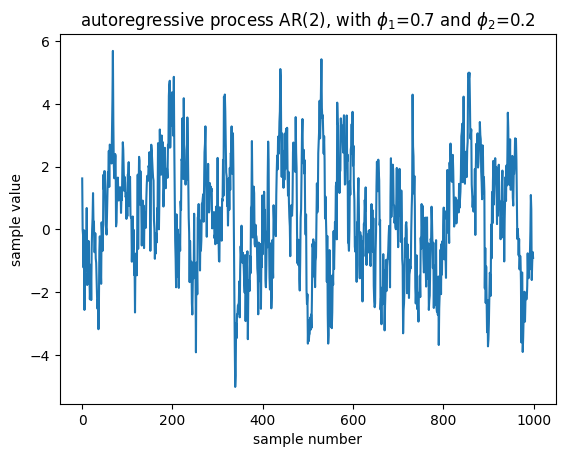

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
mu, sigma = 0, 1

N=1000
Z = np.random.normal(mu, sigma, N)

phi_1 = 0.7
phi_2 = 0.2

X = np.zeros(N)
X[0] = Z[0]
X[1] = X[1]

for t in range(2,N):
    X[t] = Z[t] + phi_1*X[t-1] + phi_2 * X[t-2]

plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title(f"autoregressive process AR(2), with $\phi_1$={phi_1} and $\phi_2$={phi_2}")  # fstring
plt.plot(X)
plt.show()

La ecuacion en diferencias para ACF es:
$$ \rho_k = \phi_1 \rho_{k-1} + \phi_2 \rho_{k-2} $$

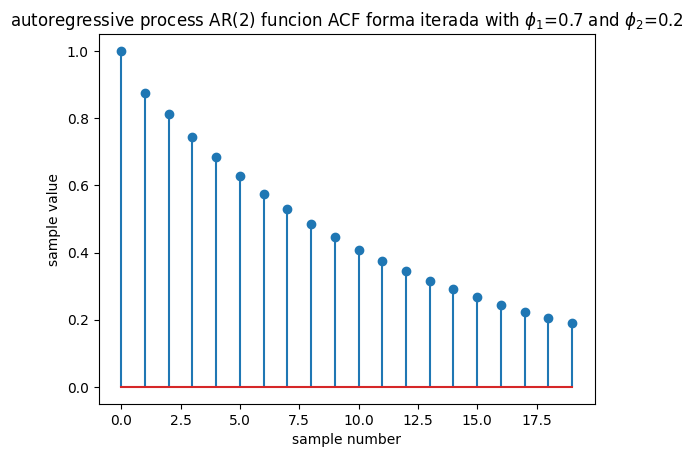

In [23]:
M=20
rho= np.zeros(M)
rho[0] = 1
rho[1] = phi_1/(1 - phi_2)

for k in range(2, M):
    rho[k] = phi_1*rho[k-1] + phi_2*rho[k-2]


plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title(f"autoregressive process AR(2) funcion ACF forma iterada with $\phi_1$={phi_1} and $\phi_2$={phi_2}")  # fstring
plt.stem(rho)
plt.show()

Implementacion analitica siguiendo la ecuacion (4)

root r1=-4.589454172900136
root r2=1.0894541729001366


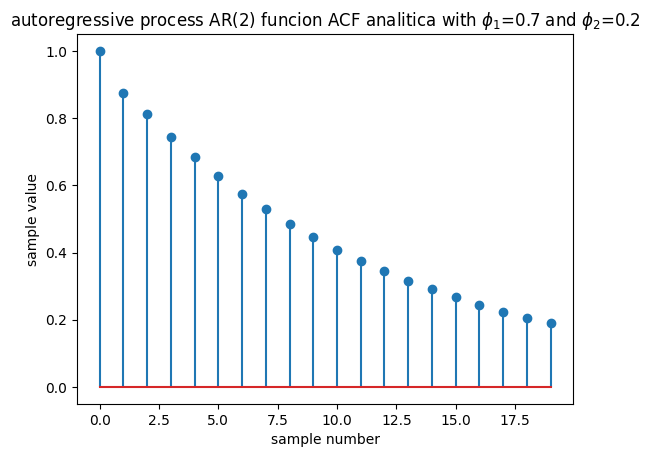

In [19]:
M=20
rhoA = np.zeros(M)

# la ecuacion caracteristica es 1 - phi_1 B - phi_2 B^2, las soluciones son

r1 = (phi_1 + np.sqrt((phi_1)**2 + 4*phi_2))/(-2 *phi_2)
r2 = (phi_1 - np.sqrt((phi_1)**2 + 4*phi_2))/(-2 *phi_2)

print(f"root r1={r1}")
print(f"root r2={r2}")

coeff = 1/(r1 - r2)

# condiciones iniciales
rhoA[0]=1
rhoA[1]=phi_1/(1 - phi_2)

C1= coeff*(r1*(rhoA[0]-r2*rhoA[1]))
C2 = coeff*r2*(r1*rhoA[1]- rhoA[0])

for i in range(2,M):
    rhoA[i] = C1*(1/r1)**i + C2*(1/r2)**i


plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title(f"autoregressive process AR(2) funcion ACF analitica with $\phi_1$={phi_1} and $\phi_2$={phi_2}")  # fstring
plt.stem(rhoA)
plt.show()

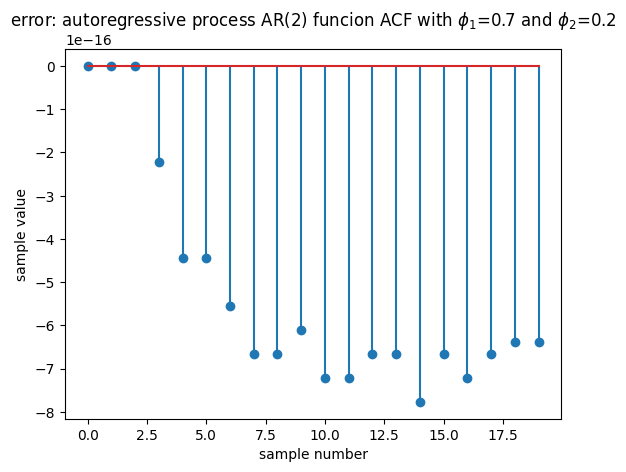

In [20]:
# calculo del error
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title(f"error: autoregressive process AR(2) funcion ACF with $\phi_1$={phi_1} and $\phi_2$={phi_2}")  # fstring
plt.stem(rho-rhoA)
plt.show()

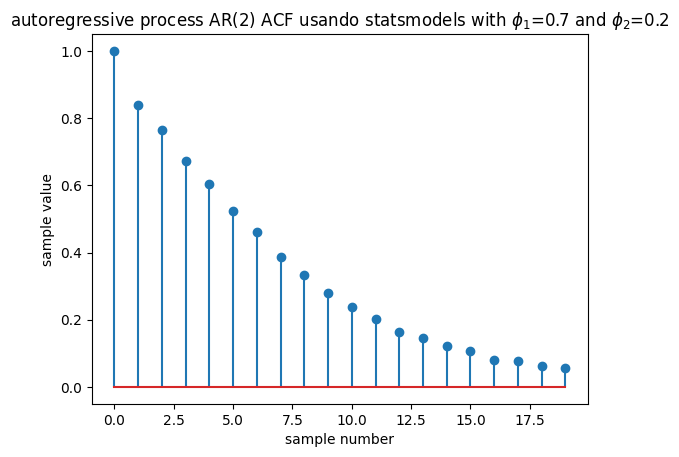

In [24]:
# usamos ahora stasmodel.api
import statsmodels.api as sm  
rho2 = sm.tsa.acf(X)[0:20]

plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title(f"autoregressive process AR(2) ACF usando statsmodels with $\phi_1$={phi_1} and $\phi_2$={phi_2}")  # fstring
plt.stem(rho2)
plt.show()

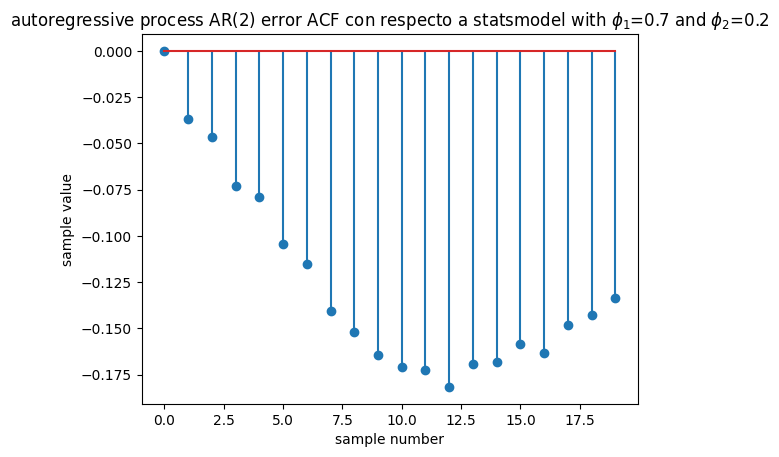

In [25]:
# error del ACF iterado versus statsmodel
plt.xlabel("sample number")
plt.ylabel("sample value")
plt.title(f"autoregressive process AR(2) error ACF con respecto a statsmodel with $\phi_1$={phi_1} and $\phi_2$={phi_2}")  # fstring
plt.stem(rho2-rho)
plt.show()

### En defensa de ```statsmodels```:
Estos procesos son analiticos por que obedecen un AR(2). Pero que pasa
si mis datos vinieron de una base de datos, de la cual ignoramos por completo el proceso que los genero?

Si, por ejemplo, el Facereader les garantiza que sus datos vienen de un proceso AR(2), entonces podemos tratar de hallar $\phi_1$, $\phi_2$ y 
aplicar cualesquiera de los 2 metodos (excluyendo ```statsmodels``` y ```numpy```).

Supongamos que queremos hallar los coeficientes $\phi_1$, $\phi_2$ conociendo los datos $X$.

Recuerden la ecuacion:

\begin{eqnarray}
\begin{pmatrix}
\rho_0 & \rho_1 \\
\rho_1 & \rho_0 
\end{pmatrix}
\begin{pmatrix}
\phi_1 \\
\phi_2
\end{pmatrix}
= \begin{pmatrix}
\rho_1 \\
\rho_2 
\end{pmatrix}
\end{eqnarray}

In [30]:
# construimos la matriz

rhomat = np.array( [ [rho[0], rho[1]], [rho[1], rho[0]]])

# invertimos la matriz
rhomatinv = np.linalg.inv(rhomat)

rhovec = np.array([rho[1], rho[2] ])

# phivec
phivec = rhomatinv.dot(rhovec)

# imprimir coeficientes
print(f"los parametros son $\phi_1=${phivec[0]}, $\phi_2=${phivec[1]}")
print("$\phi_1=$ %.1f, $\phi_2=$%.1f"%(phivec[0], phivec[1]))

los parametros son $\phi_1=$0.6999999999999992, $\phi_2=$0.20000000000000048
$\phi_1=$ 0.7, $\phi_2=$0.2


# Proxima clase:
## Modelo AR(P):

Este se calcula con la ecuacion

$$ X_t = c + \sum_{i=1}^{\text{p}} \phi_i X_{t-i} + Z_t .$$

Como queremos usar la teoria de ecuacines en diferencias, convertimos esta ecuacion a un polinomio caraceristico de orden $n$ mediante el uso del backshift operator.

Pasando todo lo que tenga $X$ a la izquierda

Esta es una ecuacion en diferencias de orden $n$.

Usando, exactamente, los metodos para ordenes 1 y 2:

\begin{eqnarray}
(1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_{\text{p}} B^p) X_t = c + Z_t
\end{eqnarray}

donde

$$p(B)= 1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_{\text{p}} B^{\text{p}} $$
es el polinomio caracteristico del sistema.

El proceso es el mismo donde

$$p(B) X_t = c + Z_t$$,
y algebraicamente la soucion particular de este sistema es

$$X_t = \frac{c + Z_t}{p(B)} $$

Lo que pasa es que quien es?  $1/p(B)$. Realmente $p(B)$ es un operador
y toca resolverlo con fracciones parciales. 

Lo tendriamos que factorizar.

$$p(B) = (1 - \varphi_1 B)^{m_1}(1 - \varphi_2 B)^{m_2} \cdots (1 - \varphi_k B^k)^{m_k} $$